# GROSS PROFIT CALCULATOR FOR VENDORS

In [133]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## STEP 1

Enter time frame

In [136]:
Days=90
Vendor="ECM"

In [137]:
def info(data):
    print("Shape:",data.shape)
    print("Size:",data.size)
    print("\n")
    print("Null Values", data.isnull().sum())
    print("\n")
    

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from datetime import datetime, timedelta  # noqa: E402
import seaborn as sn
import datetime, time

In [139]:
df=pd.read_csv("/Users/vagif/Desktop/Work docs/Gross Profit Calculator/scr/orders_export_1 5.csv", low_memory=False)

In [140]:
df['Financial Status'].value_counts()

Financial Status
paid                  6787
voided                 430
partially_refunded     248
refunded               226
authorized              30
pending                  5
Name: count, dtype: int64

In [141]:
# df=df[df["Risk Level"]!="High"]

There are some duplicated data of order numbers which needs cleaning. Some of them contain important information, so we have to keep them for further use

Drop unnecessary columns

In [142]:
df=df[['Name','Paid at','Currency', 'Financial Status', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount','Created at', 'Lineitem quantity', 'Lineitem name', 
       'Lineitem price', 'Refunded Amount', 'Shipping Province',
       'Shipping Country','Billing Province','Billing Country','Payment Method', 'Vendor', 'Outstanding Balance', 'Risk Level', 'Source',
       'Lineitem discount']]
df.shape

(10565, 25)

In [143]:
df['Created at'] = pd.to_datetime(df['Created at'], format='ISO8601', utc=True)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=Days)
start_date = pd.to_datetime(start_date, utc=True, format='ISO8601')  # Convert start_date to a Series (if needed)
end_date = pd.to_datetime(end_date, utc=True, format='ISO8601')    # Convert end_date to a Series (if needed)
df_90days = df[(df['Created at'] >= start_date) & (df['Created at'] <= end_date)]
df_90days.shape

(2828, 25)

Enter Vendor Name

In [144]:
Vendor_Data=df_90days[['Name','Paid at', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code','Discount Amount','Created at','Lineitem quantity', 'Lineitem name', 
       'Lineitem price', 'Refunded Amount', 'Shipping Province',
       'Shipping Country','Billing Province','Billing Country', 'Vendor', 'Outstanding Balance','Lineitem discount']][df_90days["Vendor"]==Vendor]

In [145]:
Vendor_Data[Vendor_Data['Name'].duplicated()].shape

(0, 20)

Separate duplicated data set from main file

In [146]:
dup_data=df_90days[df_90days['Name'].duplicated(keep=False)]
dup_data.head()

,Name,Paid at,Currency,Financial Status,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Created at,Lineitem quantity,Lineitem name,Lineitem price,Refunded Amount,Shipping Province,Shipping Country,Billing Province,Billing Country,Payment Method,Vendor,Outstanding Balance,Risk Level,Source,Lineitem discount
0,#8728,NaN,CAD,authorized,3439.74,0.00,171.99,3611.73,NaN,93.41,2024-08-29 03:53:20+00:00,1,Rocket Appartamento TCA Espresso Machine (Open...,2599.00,0.0,QC,CA,QC,CA,Shopify Payments,Rocket Espresso Milano,3611.73,Low,web,0.00
1,#8728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-29 03:53:20+00:00,1,Eureka Mignon Libra Grinder with Grind by Weig...,934.15,NaN,NaN,NaN,NaN,NaN,NaN,Eureka,NaN,NaN,NaN,93.41
5,#8724,NaN,CAD,authorized,41.97,8.99,2.55,53.51,NaN,0.00,2024-08-28 22:30:26+00:00,1,Torani Pumpkin Spice Syrup (750ml),13.99,0.0,AB,CA,AB,CA,Shopify Payments,Torani,53.51,Low,web,0.00
6,#8724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-28 22:30:26+00:00,1,Torani Salted Caramel Syrup (750ml),13.99,NaN,NaN,NaN,NaN,NaN,NaN,Torani,NaN,NaN,NaN,0.00
7,#8724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-28 22:30:26+00:00,1,Torani Apple Syrup (750ml),13.99,NaN,NaN,NaN,NaN,NaN,NaN,Torani,NaN,NaN,NaN,0.00


Code block below finds duplicated orders among profitec orders and collect them under dataframe "duplicated_data"

In [147]:
duplicated_data = pd.DataFrame()
order_num=list(Vendor_Data["Name"].unique())
for i in order_num:
    record=dup_data[dup_data["Name"]==i].dropna(subset="Total")
    duplicated_data = pd.concat([duplicated_data, record])

In [148]:
info(duplicated_data)

Shape: (3, 25)
Size: 75


Null Values Name                   0
Paid at                0
Currency               0
Financial Status       0
Subtotal               0
Shipping               0
Taxes                  0
Total                  0
Discount Code          0
Discount Amount        0
Created at             0
Lineitem quantity      0
Lineitem name          0
Lineitem price         0
Refunded Amount        0
Shipping Province      2
Shipping Country       2
Billing Province       1
Billing Country        1
Payment Method         0
Vendor                 0
Outstanding Balance    0
Risk Level             0
Source                 0
Lineitem discount      0
dtype: int64




In [149]:
duplicated_data=duplicated_data[['Name','Paid at', 'Subtotal', 'Shipping',
       'Taxes', 'Total','Discount Code', 'Discount Amount','Created at','Lineitem quantity', 'Lineitem name', 
       'Lineitem price', 'Refunded Amount', 'Shipping Province',
       'Shipping Country','Billing Province','Billing Country', 'Vendor', 'Outstanding Balance','Lineitem discount']]

In [150]:
duplicated_data.shape, Vendor_Data.shape

((3, 20), (4, 20))

Merge duplicated data and profitec file to get final Merged_Profitec

In [151]:
Merged=pd.merge(Vendor_Data,duplicated_data, on="Name", how='left')
Merged

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Shipping Province_x,Shipping Country_x,Billing Province_x,Billing Country_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Paid at_y,Subtotal_y,Shipping_y,Taxes_y,Total_y,Discount Code_y,Discount Amount_y,Created at_y,Lineitem quantity_y,Lineitem name_y,Lineitem price_y,Refunded Amount_y,Shipping Province_y,Shipping Country_y,Billing Province_y,Billing Country_y,Vendor_y,Outstanding Balance_y,Lineitem discount_y
0,#8287,2024-08-14 15:07:40 -0400,175.5,0.0,8.78,184.28,Custom discount,19.50,2024-08-12 16:15:06+00:00,1,ECM Knock Box M (Drawer),195.00,0.0,MB,CA,MB,CA,ECM,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#7919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-29 21:26:53+00:00,1,ECM Knock Box M (Drawer),195.00,NaN,NaN,NaN,NaN,NaN,ECM,NaN,0.0,2024-08-02 15:39:26 -0400,1065.6,0.0,53.29,1118.89,TKBSIGNUP-JDHSBJ7W,118.40,2024-07-29 21:26:53+00:00,1.0,Eureka Mignon Libra Grinder with Grind by Weig...,989.00,0.0,MB,CA,MB,CA,Eureka,0.0,0.0
2,#7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-25 00:48:21+00:00,1,ECM Knock Box (Drawer),199.00,NaN,NaN,NaN,NaN,NaN,ECM,NaN,0.0,2024-07-30 20:48:32 -0400,2573.2,0.0,334.51,2907.71,TKBSIGNUP-55S7LWW2,224.80,2024-07-25 00:48:21+00:00,1.0,Ascaso Steel Duo V2 PID Dual Boiler Espresso M...,2049.00,0.0,NaN,NaN,ON,CA,Ascaso,0.0,0.0
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.00,4520.00,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,NaN,NaN,NaN,NaN,ECM,0.0,0.0,2024-07-10 14:49:26 -0400,4000.0,0.0,520.00,4520.00,David discount,675.99,2024-07-10 18:48:54+00:00,1.0,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,NaN,NaN,NaN,NaN,ECM,0.0,0.0


In [152]:
Merged[(Merged["Shipping Country_x"].isnull())&(Merged["Shipping Country_y"].isnull())]

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Shipping Province_x,Shipping Country_x,Billing Province_x,Billing Country_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Paid at_y,Subtotal_y,Shipping_y,Taxes_y,Total_y,Discount Code_y,Discount Amount_y,Created at_y,Lineitem quantity_y,Lineitem name_y,Lineitem price_y,Refunded Amount_y,Shipping Province_y,Shipping Country_y,Billing Province_y,Billing Country_y,Vendor_y,Outstanding Balance_y,Lineitem discount_y
2,#7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-25 00:48:21+00:00,1,ECM Knock Box (Drawer),199.00,NaN,NaN,NaN,NaN,NaN,ECM,NaN,0.0,2024-07-30 20:48:32 -0400,2573.2,0.0,334.51,2907.71,TKBSIGNUP-55S7LWW2,224.80,2024-07-25 00:48:21+00:00,1.0,Ascaso Steel Duo V2 PID Dual Boiler Espresso M...,2049.00,0.0,NaN,NaN,ON,CA,Ascaso,0.0,0.0
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,NaN,NaN,NaN,NaN,ECM,0.0,0.0,2024-07-10 14:49:26 -0400,4000.0,0.0,520.00,4520.00,David discount,675.99,2024-07-10 18:48:54+00:00,1.0,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,NaN,NaN,NaN,NaN,ECM,0.0,0.0


There is no item category, therefore we can't filter orders for espresso machines. Lineitem price column helps to identify espresso machines. Price for espresso machines start from 1000$ CAD. Item's below 120 CAD is either accessory or consumeable. Histogram below shows price distribution. 

Text(0.5, 1.0, "Item's Price Distribution between 140-250$ CAD")

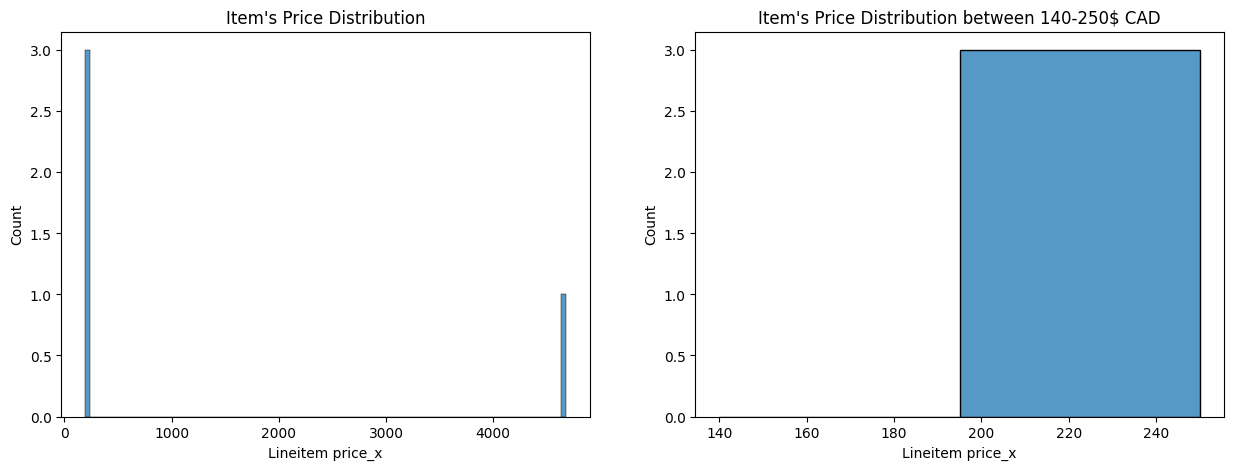

In [153]:
fig,axes=plt.subplots(1,2, figsize=(15,5))
sn.histplot(x=Merged["Lineitem price_x"], ax=axes[0], binwidth=40)
sn.histplot(x=Merged["Lineitem price_x"], ax=axes[1], binwidth=50, binrange=(140,250))
axes[0].set_title("Item's Price Distribution")
axes[1].set_title("Item's Price Distribution between 140-250$ CAD")

In [154]:
Merged=Merged[Merged["Lineitem price_x"]>250]

In [155]:
Merged.shape

(1, 39)

In [156]:
Merged[Merged["Shipping Country_x"].isnull()].shape

(1, 39)

In [157]:
def fill_shipping_country(row):
    shipping_country_columns = ["Shipping Country_x", "Shipping Country_y", "Billing Country_x", "Billing Country_y"]
    for col in shipping_country_columns:
        if pd.notnull(row[col]):
            return row[col]
    return None  # Return None if all columns are null

# Apply the function to the DataFrame
Merged["Shipping Country"] = Merged.apply(fill_shipping_country, axis=1)

def fill_shipping_province(row):
    shipping_province_columns = ["Shipping Province_x","Shipping Province_y", "Billing Province_x", "Billing Province_y"]
    for col in shipping_province_columns:
        if pd.notnull(row[col]):
            return row[col]
    return None  # Return None if all columns are null

# Apply the function to the DataFrame
Merged["Shipping Province"] = Merged.apply(fill_shipping_province, axis=1)

/var/folders/lk/wst_0sqs60d07nd2qn7mjc_r0000gn/T/ipykernel_27966/2054148575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged["Shipping Country"] = Merged.apply(fill_shipping_country, axis=1)
/var/folders/lk/wst_0sqs60d07nd2qn7mjc_r0000gn/T/ipykernel_27966/2054148575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged["Shipping Province"] = Merged.apply(fill_shipping_province, axis=1)


In [158]:
Merged=Merged.drop(columns=["Shipping Country_x","Shipping Province_x","Shipping Country_y","Shipping Province_y","Billing Country_x","Billing Province_x", "Billing Country_y","Billing Province_y"])

In [159]:
Merged_Null=Merged[Merged["Discount Code_x"].isnull()]
Merged_Not_Null=Merged[~Merged["Discount Code_x"].isnull()]

In [160]:
# Merged_Profitec_Null["Discount Code_x"]=Merged_Profitec_Null["Discount Code_y"]
# Merged_Profitec_Null["Discount Amount_x"]=Merged_Profitec_Null["Discount Amount_y"]

In [161]:
def discount_code(row):
    if pd.isnull(row["Discount Code_x"]) and not pd.isnull(row["Discount Code_y"]):
        discount = row["Discount Code_y"]
    else:
        discount = row["Discount Code_x"]
    return discount

Merged_Null["Discount Code_x"] = Merged_Null.apply(discount_code, axis=1)

In [162]:
def discount_fix(row):
    if pd.isnull(row["Discount Amount_x"]) and not pd.isnull(row["Discount Amount_y"]):
        discount = row["Discount Amount_y"]
    else:
        discount = row["Discount Amount_x"]
    return discount

Merged_Null["Discount Amount_x"] = Merged_Null.apply(discount_fix, axis=1)

In [163]:
def outstanding_balance(row):
    if pd.isnull(row["Outstanding Balance_x"]) and not pd.isnull(row["Outstanding Balance_y"]):
        discount = row["Outstanding Balance_y"]
    else:
        discount = row["Outstanding Balance_x"]
    return discount

Merged_Null["Outstanding Balance_x"] = Merged_Null.apply(outstanding_balance, axis=1)

In [164]:
def date(row):
    if pd.isnull(row["Paid at_x"]) and not pd.isnull(row["Paid at_y"]):
        time = row["Paid at_y"]
    else:
        time = row["Paid at_x"]
    return time

Merged_Null["Paid at_x"] = Merged_Null.apply(date, axis=1)

In [165]:
Merged_Null

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Paid at_y,Subtotal_y,Shipping_y,Taxes_y,Total_y,Discount Code_y,Discount Amount_y,Created at_y,Lineitem quantity_y,Lineitem name_y,Lineitem price_y,Refunded Amount_y,Vendor_y,Outstanding Balance_y,Lineitem discount_y,Shipping Country,Shipping Province


In [166]:
Merged_Null=pd.concat([Merged_Null,Merged_Not_Null])

In [167]:
Merged_Null.columns

Index(['Name', 'Paid at_x', 'Subtotal_x', 'Shipping_x', 'Taxes_x', 'Total_x',
       'Discount Code_x', 'Discount Amount_x', 'Created at_x',
       'Lineitem quantity_x', 'Lineitem name_x', 'Lineitem price_x',
       'Refunded Amount_x', 'Vendor_x', 'Outstanding Balance_x',
       'Lineitem discount_x', 'Paid at_y', 'Subtotal_y', 'Shipping_y',
       'Taxes_y', 'Total_y', 'Discount Code_y', 'Discount Amount_y',
       'Created at_y', 'Lineitem quantity_y', 'Lineitem name_y',
       'Lineitem price_y', 'Refunded Amount_y', 'Vendor_y',
       'Outstanding Balance_y', 'Lineitem discount_y', 'Shipping Country',
       'Shipping Province'],
      dtype='object')

In [168]:
Merged_Null.drop(columns=['Paid at_y', 'Created at_y', 'Lineitem quantity_y',
       'Lineitem name_y', 'Lineitem price_y', 'Refunded Amount_y', 'Vendor_y',
       'Outstanding Balance_y','Shipping_y'], inplace=True)

In [169]:
Merged_Null

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Subtotal_y,Taxes_y,Total_y,Discount Code_y,Discount Amount_y,Lineitem discount_y,Shipping Country,Shipping Province
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,4000.0,520.0,4520.0,David discount,675.99,0.0,None,None


In [170]:
E_data=Merged_Null

In [171]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 3 to 3
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Name                   1 non-null      object             
 1   Paid at_x              1 non-null      object             
 2   Subtotal_x             1 non-null      float64            
 3   Shipping_x             1 non-null      float64            
 4   Taxes_x                1 non-null      float64            
 5   Total_x                1 non-null      float64            
 6   Discount Code_x        1 non-null      object             
 7   Discount Amount_x      1 non-null      float64            
 8   Created at_x           1 non-null      datetime64[ns, UTC]
 9   Lineitem quantity_x    1 non-null      int64              
 10  Lineitem name_x        1 non-null      object             
 11  Lineitem price_x       1 non-null      float64            
 12  Ref

In [172]:
E_data["Discount Code_y"]=E_data["Discount Code_y"].fillna("No Code")
E_data["Discount Code_x"]=E_data["Discount Code_x"].fillna("No Code")

In [173]:
E_data["Lineitem discount_y"]=E_data["Lineitem discount_y"].fillna(0)

In [174]:
# def discount_function(row):
#     if row["Lineitem discount_x"]==0 and row["Lineitem discount_y"]==0 and  row["Discount Amount_x"]>row["Lineitem price_x"]*0.095 and row["Discount Code_x"] not in ("Custom discount", "No Code"):
#         discount=round(row["Lineitem price_x"]*0.1,2)
#     elif row["Discount Code_x"]=="Custom discount":
#         discount=round(row["Discount Amount_x"]*row["Lineitem price_x"]/row["Subtotal_x"],2)
#     else:
#         discount=row["Lineitem discount_x"]
#     return discount

In [175]:
# E_data["Discount Amount_x"]=E_data.apply(discount_function, axis=1)

In [176]:
E_data["Lineitem name_x"].value_counts()

Lineitem name_x
ECM Synchronika PID with Flow Control Semi-Automatic Espresso Machine (Stainless Steel)    1
Name: count, dtype: int64

In [177]:
# E_data["Discount Amount_x"]=E_data["Discount Amount_x"].fillna(0)

In [178]:
E_data["Subtotal_x"]=E_data["Lineitem price_x"]-E_data["Discount Amount_x"]
E_data.head(1)

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Subtotal_y,Taxes_y,Total_y,Discount Code_y,Discount Amount_y,Lineitem discount_y,Shipping Country,Shipping Province
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,4000.0,520.0,4520.0,David discount,675.99,0.0,None,None


In [179]:
E_data=E_data.drop(columns=['Subtotal_y', 'Taxes_y','Total_y','Discount Code_y', 'Lineitem discount_y'])

In [180]:
tax_perc={"ON":13,
         "QC":5,
         "BC":5,
         "NS":15}

In [181]:
E_data["Shipping Country"]=E_data["Shipping Country"].fillna("CA")
E_data["Shipping Province"]=E_data["Shipping Province"].fillna("ON")

In [182]:
E_data["Tax %"]=E_data["Shipping Province"].map(tax_perc)
E_data["Tax %"]=E_data["Tax %"].fillna(0)

In [183]:
E_data

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Discount Amount_y,Shipping Country,Shipping Province,Tax %
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,675.99,CA,ON,13


In [184]:
def tax_func(row):
    if row["Shipping Country"]=="CA":
        return round((row["Lineitem price_x"]-row["Discount Amount_x"])*row["Tax %"]/100,2)
    else:
        return 0

In [185]:
E_data["Gross Sale"]=E_data["Lineitem price_x"]+E_data["Taxes_x"]

In [186]:
E_data["Taxes_x"]=E_data.apply(tax_func, axis=1)

In [187]:
E_data

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Discount Amount_y,Shipping Country,Shipping Province,Tax %,Gross Sale
3,#7459,2024-07-10 14:49:26 -0400,4000.0,0.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,675.99,CA,ON,13,5195.99


In [188]:
E_data["Shipping_x"]=E_data["Shipping_x"].fillna(0)
E_data["Shipping_x"]=E_data["Shipping_x"].replace(0,60)

# FINALIZE

1. Gross Sale --> Sales after tax and discounts
2. Net Sale --> Gross Sale after refunds
3. Shipping --> 50$
4. Card Fee --> 4%
5. Cost --> COGS Price List
6. Gross Profit --> [Net Sale]-[Shipping]-[Card Fee]-[Cost](COGS for Gross Sale)

In [189]:
E_data["Gross Sale"]=E_data["Lineitem price_x"]+E_data["Taxes_x"]-E_data["Discount Amount_x"]

In [190]:
E_data

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Discount Amount_y,Shipping Country,Shipping Province,Tax %,Gross Sale
3,#7459,2024-07-10 14:49:26 -0400,4000.0,60.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,675.99,CA,ON,13,4520.0


In [191]:
Final=E_data[['Name','Paid at_x','Lineitem name_x','Gross Sale','Lineitem price_x', 'Shipping_x', 'Taxes_x', 'Discount Amount_x','Refunded Amount_x']]
E_data.head(6)

,Name,Paid at_x,Subtotal_x,Shipping_x,Taxes_x,Total_x,Discount Code_x,Discount Amount_x,Created at_x,Lineitem quantity_x,Lineitem name_x,Lineitem price_x,Refunded Amount_x,Vendor_x,Outstanding Balance_x,Lineitem discount_x,Discount Amount_y,Shipping Country,Shipping Province,Tax %,Gross Sale
3,#7459,2024-07-10 14:49:26 -0400,4000.0,60.0,520.0,4520.0,David discount,675.99,2024-07-10 18:48:54+00:00,1,ECM Synchronika PID with Flow Control Semi-Aut...,4675.99,0.0,ECM,0.0,0.0,675.99,CA,ON,13,4520.0


In [192]:
Final["Lineitem name_x"].unique()

array(['ECM Synchronika PID with Flow Control Semi-Automatic Espresso Machine (Stainless Steel)'],
      dtype=object)

In [193]:
dict_product={'ECM Synchronika PID with Flow Control Semi-Automatic Espresso Machine (Stainless Steel)':3480}

pro_pr_list=pd.DataFrame({"Lineitem name_x":dict_product.keys(),
                         "Cost ($CAD)":dict_product.values()})
pro_pr_list

,Lineitem name_x,Cost ($CAD)
0,ECM Synchronika PID with Flow Control Semi-Aut...,3480


In [194]:
Final=pd.merge(Final, pro_pr_list, on="Lineitem name_x", how="left")

In [195]:
Final["Refunded Amount_x"]=Final["Refunded Amount_x"].fillna(0)

In [196]:
Final

,Name,Paid at_x,Lineitem name_x,Gross Sale,Lineitem price_x,Shipping_x,Taxes_x,Discount Amount_x,Refunded Amount_x,Cost ($CAD)
0,#7459,2024-07-10 14:49:26 -0400,ECM Synchronika PID with Flow Control Semi-Aut...,4520.0,4675.99,60.0,520.0,675.99,0.0,3480


In [197]:
Final["Net Sale ($CAD)"]=Final["Gross Sale"]-Final["Refunded Amount_x"]

In [198]:
Final.head(6)

,Name,Paid at_x,Lineitem name_x,Gross Sale,Lineitem price_x,Shipping_x,Taxes_x,Discount Amount_x,Refunded Amount_x,Cost ($CAD),Net Sale ($CAD)
0,#7459,2024-07-10 14:49:26 -0400,ECM Synchronika PID with Flow Control Semi-Aut...,4520.0,4675.99,60.0,520.0,675.99,0.0,3480,4520.0


In [199]:
Final["Card Fee 4% ($CAD)"]=round(Final["Net Sale ($CAD)"]*4/100,2)

In [200]:
Final["Gross Profit ($CAD)"]=Final["Net Sale ($CAD)"]-Final['Card Fee 4% ($CAD)']-Final["Cost ($CAD)"]-Final["Shipping_x"]

In [201]:
Final=Final[['Name', 'Paid at_x','Lineitem name_x', 'Gross Sale','Net Sale ($CAD)', 'Card Fee 4% ($CAD)', 'Shipping_x', 'Cost ($CAD)','Gross Profit ($CAD)']]

In [202]:
Final.columns

Index(['Name', 'Paid at_x', 'Lineitem name_x', 'Gross Sale', 'Net Sale ($CAD)',
       'Card Fee 4% ($CAD)', 'Shipping_x', 'Cost ($CAD)',
       'Gross Profit ($CAD)'],
      dtype='object')

In [203]:
Final

,Name,Paid at_x,Lineitem name_x,Gross Sale,Net Sale ($CAD),Card Fee 4% ($CAD),Shipping_x,Cost ($CAD),Gross Profit ($CAD)
0,#7459,2024-07-10 14:49:26 -0400,ECM Synchronika PID with Flow Control Semi-Aut...,4520.0,4520.0,180.8,60.0,3480,799.2


In [204]:
Final.rename(columns={"Name":"Order Number",
                      "Paid at_x":" Transaction date",
                     "Lineitem name_x": "Product's Name",
                     "Shipping_x":"Shipping Cost ($CAD)",
                     "Gross Sale":"Gross Sale ($CAD)"}, inplace=True)

/var/folders/lk/wst_0sqs60d07nd2qn7mjc_r0000gn/T/ipykernel_27966/2017990147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final.rename(columns={"Name":"Order Number",


In [205]:
Final_dict={"Number of Orders":Final["Product's Name"].count(),
            "Gross Sale ($CAD)":Final["Gross Sale ($CAD)"].sum(),
            "Net Sale ($CAD)":round(Final["Net Sale ($CAD)"].sum(),2),
           "Total Cost ($CAD)":Final["Cost ($CAD)"].sum(),
           "Total Shipping ($CAD)":Final["Shipping Cost ($CAD)"].sum(),
           "Gross Profit ($CAD)":Final["Gross Profit ($CAD)"].sum()}
Show_Data=pd.DataFrame(Final_dict, index=["ECM Summary"])

In [206]:
Final["Gross Profit Margin (%)"]=round(Final["Gross Profit ($CAD)"]/Final["Gross Sale ($CAD)"]*100,2)

/var/folders/lk/wst_0sqs60d07nd2qn7mjc_r0000gn/T/ipykernel_27966/3499138284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final["Gross Profit Margin (%)"]=round(Final["Gross Profit ($CAD)"]/Final["Gross Sale ($CAD)"]*100,2)


In [207]:
Show_Data

,Number of Orders,Gross Sale ($CAD),Net Sale ($CAD),Total Cost ($CAD),Total Shipping ($CAD),Gross Profit ($CAD)
ECM Summary,1,4520.0,4520.0,3480,60.0,799.2


In [208]:
# Final.to_csv("Results/Last_90days ECM.csv")

In [209]:
Final

,Order Number,Transaction date,Product's Name,Gross Sale ($CAD),Net Sale ($CAD),Card Fee 4% ($CAD),Shipping Cost ($CAD),Cost ($CAD),Gross Profit ($CAD),Gross Profit Margin (%)
0,#7459,2024-07-10 14:49:26 -0400,ECM Synchronika PID with Flow Control Semi-Aut...,4520.0,4520.0,180.8,60.0,3480,799.2,17.68
